In [1]:
#Import the data set using the pandas
import pandas as pd
data= pd.read_csv("insurance_pre.csv")
data

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [2]:
#To slice the data set like row cunt,column count
row_count=len(data.index)
print("Number of rows:",row_count)
column_count= data.shape[1]
print("Number of columns:",column_count)


Number of rows: 1338
Number of columns: 6


In [3]:
#Update the categorical column data using the one hot encode
data= pd.get_dummies(data,drop_first=True)


In [4]:
data.columns


Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [5]:
#split the input & output of the data set
independent= data[['age', 'bmi', 'children', 'sex_male', 'smoker_yes']]
dependent= data[['charges']]

In [6]:
#split the train & test data set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(independent,dependent,test_size=0.30,random_state=0)

In [7]:
#create the DT model
from sklearn.tree import DecisionTreeRegressor
regressor= DecisionTreeRegressor(criterion='mae',splitter='random',max_features='auto')
regressor= regressor.fit(x_train,y_train)


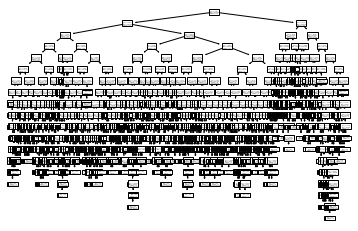

In [9]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [10]:
y_pred= regressor.predict(x_test)

In [11]:
#Evaluvate the model
from sklearn.metrics import r2_score
r2score = r2_score(y_test,y_pred)
r2score

0.7959825934438268

In [12]:
#save the model
import pickle
filename= "Finalize_DT.sav"
pickle.dump(regressor,open(filename,'wb'))